In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import utils
from glob import glob
from importlib import reload
import consts
from statannot import add_stat_annotation
reload(consts)
reload(utils)
PATH = os.getcwd()

c:\Users\shtolz\Desktop\Hypoxia\2025_Mitochondria_Hypoxia_Project\utils.py:223: SyntaxWarning: invalid escape sequence '\.'
  prefix = prefix.replace('\.','') + '.'


In [8]:
# Generate combined results and count files. 
RES_PATH = os.path.join(PATH, 'data', 'combined_rna_seq', 'results')


results_df = utils.combine_result_files(RES_PATH)
results_df['Name'] = results_df['Name'].str.upper()
results_df.to_parquet(os.path.join(PATH, 'data', 'combined_rna_seq', 'combined_results', 'combined_results.parquet.gzip'), index=False, engine = 'fastparquet', compression='gzip')
# Rename Name to gene
results_df = results_df.rename(columns={'Name': 'gene'})

In [9]:
# Generate summaries of the number of samples, datasets and cell types represented
print(f"{len(results_df.dataset.unique())} different datasets\nBelonging to {len(results_df.cell_line.unique())} different cells with an average of {results_df.groupby('cell_line').agg({'dataset' : 'nunique'}).mean()}+- {results_df.groupby('cell_line').agg({'dataset' : 'nunique'}).std()} datasets per cell")

29 different datasets
Belonging to 21 different cells with an average of dataset    1.380952
dtype: float64+- dataset    0.740013
dtype: float64 datasets per cell


In [10]:
mt_per_dataset = results_df[results_df['Genome'] == 'MT'].groupby(['gene', 'dataset']).agg({'log2FoldChange' : 'mean', 'padj' : 'mean',}).reset_index().sort_values(by=['gene'], ascending=False)

In [11]:
coordinated,uncoordinated, unknown, coord_mag,  coord_mag_dict, nuc_mag_dict = utils.mitonuclear_coordination(results_df)

Not enough both genes in A549_hypx_0 (MT: 1, NUC: 9). Skipping...
Not enough both genes in A549_hypx_1 (MT: 6, NUC: 6). Skipping...
Not enough both genes in A549_hypx_2 (MT: 4, NUC: 57). Skipping...
Not enough both genes in HUVEC_rna_hypx (MT: 4, NUC: 29). Skipping...
Not enough both genes in MDA_231_hypx_1 (MT: 1, NUC: 69). Skipping...
Not enough both genes in PC3_hypx_0 (MT: 1, NUC: 47). Skipping...
Not enough both genes in RCC4_hypx_1 (MT: 3, NUC: 33). Skipping...
Not enough both genes in SMC_hypx_1 (MT: 0, NUC: 43). Skipping...
Not enough both genes in U87_local (MT: 0, NUC: 22). Skipping...
Out of 27 datasets, 9 datasets were skipped due to insufficient genes.
15 datasets were coordinated, and 3 datasets were uncoordinated.
The magnitude of coordination was 0.14 +- 0.15


In [13]:
reg_genes_df = pd.read_csv(os.path.join(PATH, 'data', 'genes', 'RNAstabilityAndTranscriptGenes.tsv'),sep = '\t')
reg_genes = reg_genes_df.Name.unique()


In [15]:
results_df_mat = results_df[results_df['padj'] < 0.05].pivot_table(index = 'gene', columns = 'dataset', values = 'log2FoldChange')
results_df_mat.loc[((results_df_mat != 0).mean(axis = 1)) > 0.5, :]

dataset,A549_hypx_0,A549_hypx_1,A549_hypx_2,AsPC1_hypx_1,H460_hypx_1,HCT-116_hypx_0,HCT-116_hypx_2,HCT-116_local,HPMEC_hypx_1,HUVEC_rna_hypx,...,MDA_231_hypx_1,PC3_hypx_0,PC3_hypx_1,RCC4_hypx_1,RKO_hypx_1,RPE_hypx_1,SMC_hypx_1,T47D_hypx_0,T_hypx_1,U87_local
gene,,,,,,,,,,,,,,,,,,,,,
A1BG-AS1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1CF,NaN,NaN,NaN,0.433923,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.433923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A2M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.039969,NaN,NaN,NaN
A2M-AS1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.867424,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A2ML1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,NaN,NaN,NaN,NaN,-1.013298,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.916845,NaN,NaN,NaN,-1.085763,-1.830954,NaN
ZYG11B,NaN,NaN,NaN,NaN,0.436992,NaN,NaN,NaN,-0.231481,NaN,...,NaN,0.629044,NaN,-0.723463,NaN,0.298379,0.347079,0.583779,NaN,NaN
ZYX,NaN,NaN,NaN,0.275115,0.792215,0.977233,NaN,0.575231,0.255243,-0.456872,...,0.613151,0.483829,0.275115,NaN,NaN,-0.757821,0.632612,NaN,NaN,NaN


In [18]:
results_df_mat = results_df[results_df['padj'] < 0.05].pivot_table(index = 'gene', columns = 'dataset', values = 'log2FoldChange')
results_df_mat = results_df_mat.dropna(axis = 1, how = 'all').fillna(0)

# Reg gene results
reg_genes_mat = results_df_mat.loc[[i.upper() for i in reg_genes if i in results_df_mat.index],:]
# Sort reg_genes_mat by median LFC
reg_genes_mat = reg_genes_mat.loc[reg_genes_mat.median(axis = 1).sort_values(ascending = False).index,:]
# Drop genes with 0 LFC in majority of samples
reg_genes_mat = reg_genes_mat.loc[((reg_genes_mat != 0).mean(axis = 1)) > 0.5, :]
# Drop U87-MG and HEB columns
reg_genes_mat = reg_genes_mat.drop(columns = ['U87-MG 2', 'HEB', 'mean', 'U87-MG'], errors = 'ignore')
reg_genes_mat.head()


dataset,A549_hypx_0,A549_hypx_1,A549_hypx_2,AsPC1_hypx_1,H460_hypx_1,HCT-116_hypx_0,HCT-116_hypx_2,HCT-116_local,HPMEC_hypx_1,HUVEC_rna_hypx,...,MDA_231_hypx_1,PC3_hypx_0,PC3_hypx_1,RCC4_hypx_1,RKO_hypx_1,RPE_hypx_1,SMC_hypx_1,T47D_hypx_0,T_hypx_1,U87_local
gene,,,,,,,,,,,,,,,,,,,,,
AK4,2.547189,2.511078,1.997526,0.635181,2.591553,1.791497,1.479066,1.184458,0.959486,3.061725,...,-0.407407,0.870633,0.635181,1.671361,0.000000,1.497057,0.878673,2.336242,3.304296,1.113295
DUSP1,0.962302,0.000000,1.514291,0.567368,1.613206,1.699214,2.780043,2.010214,0.583368,1.499584,...,1.505825,1.338598,0.567368,2.570483,1.472471,0.624877,-1.132195,1.056034,0.443289,0.581699
JUN,1.182081,0.918183,1.840672,0.448920,1.795963,2.956818,0.000000,1.343957,0.000000,0.562707,...,0.586639,0.000000,0.448920,1.371435,0.000000,1.086044,-0.790808,1.596433,1.230504,0.426021
FOSL2,0.000000,0.000000,0.499837,0.900917,1.225585,2.918804,3.041824,2.234583,0.000000,0.384017,...,0.552959,0.797448,0.900917,0.000000,2.298259,0.949187,0.000000,2.009815,0.469622,0.000000
FOS,0.000000,0.000000,2.327177,1.813886,1.558677,1.090806,1.108253,-0.432852,0.000000,0.000000,...,-1.362741,0.000000,1.813886,0.000000,0.000000,1.418982,0.612951,3.610156,1.486140,0.000000


In [19]:
# Load glycolysis genes
glycolysis_genes = utils.genelist(os.path.join(PATH, 'data', 'genes', 'glycolytic processGO_0006096.txt'))
# Drop duplicate genes
glycolysis_genes = glycolysis_genes.drop_duplicates()
# Drop gene value 'gene'
glycolysis_genes = glycolysis_genes[glycolysis_genes['gene'] != 'gene'].gene.unique().tolist()
# Upper list
glycolysis_genes = [i.upper() for i in glycolysis_genes]

# Load ROS genes
ros_genes = utils.genelist(os.path.join(PATH, 'data', 'genes', 'ROS_production.tsv'))
# Drop duplicate genes
ros_genes = ros_genes.drop_duplicates().Name.unique().tolist()
# Upper list
ros_genes = [i.upper() for i in ros_genes]

# Lactate dehydrogenase genes
ldh_genes = utils.genelist(os.path.join(PATH, 'data', 'genes', 'L-lactate dehydrogenase activityGO_0004459.txt'))
# Drop duplicate genes
ldh_genes = ldh_genes.drop_duplicates()
# Drop gene value 'gene'
ldh_genes = ldh_genes[ldh_genes['gene'] != 'gene'].gene.unique().tolist()
# Upper list
ldh_genes = [i.upper() for i in ldh_genes]


# Create glyc genes mat
gly_genes_mat = results_df_mat.loc[[i for i in glycolysis_genes if i in results_df_mat.index],:]
# Remove genes with 0 LFC in majority of samples
gly_genes_mat = gly_genes_mat.loc[((gly_genes_mat != 0).mean(axis = 1)) > 0.5, :]
# Remove genes with NA in majority of samples
gly_genes_mat = gly_genes_mat.loc[gly_genes_mat.isna().mean(axis = 1) < 0.5, :]
gly_genes_mat = gly_genes_mat.loc[gly_genes_mat.median(axis = 1).sort_values(ascending = False).index,:]
# Create ros genes mat
ros_genes_mat = results_df_mat.loc[[i for i in ros_genes if i in results_df_mat.index],:]
# Remove genes with 0 LFC in majority of samples
ros_genes_mat = ros_genes_mat.loc[((ros_genes_mat != 0).mean(axis = 1)) > 0.5, :]
# Remove genes with NA in majority of samples
ros_genes_mat = ros_genes_mat.loc[ros_genes_mat.isna().mean(axis = 1) < 0.5, :]
ros_genes_mat = ros_genes_mat.loc[ros_genes_mat.median(axis = 1).sort_values(ascending = False).index,:]



In [21]:
coord_dict = {i : 'purple' for i in coordinated}
coord_dict.update({i : 'orange' for i in uncoordinated})
coord_dict.update({i : 'grey' for i in unknown})


results_df['cell_type'] = results_df['dataset'].apply(lambda x: x.split('_')[0].split(' ')[0].upper())
results_df['Genome'] = results_df['Genome'].fillna('NUC')
results_annot = results_df.groupby('dataset').agg({'cell_type' : 'first'}).reset_index()

colors = dict(zip(results_annot['cell_type'].unique(), sns.color_palette('tab20', n_colors = len(results_annot['cell_type'].unique()))))
results_annot['Cell Type'] = results_annot['cell_type'].map(colors)
results_annot = results_annot.set_index('dataset')
results_annot['Coordination'] = results_annot.index.map(coord_dict)
display(results_annot.head(2))

gene_annot = results_df.groupby('gene').agg({'Genome' : 'first', 'Complex' : 'first', 'Description' : 'first'}).reset_index().set_index('gene')
# Add ap1 annotation
gene_annot['AP1'] = gene_annot.index.isin(consts.AP1)
genome_colors = {'NUC' : 'blue', 'MT' : 'red'}
gene_annot['Genome'] = gene_annot['Genome'].map(genome_colors)
gene_annot['Complex'] = gene_annot['Complex'].map({'I' : 'green', 'II' : 'orange', 'III' : 'purple', 'IV' : 'brown', 'V' : 'pink', 'Ribosome' : 'grey'})
gene_annot['AP1'] = gene_annot['AP1'].map({True : 'red', False : 'grey'})

reg_genes_annot = gene_annot.loc[[i.upper() for i in reg_genes_mat.index if i in gene_annot.index],:]
display(gene_annot.head(2))

,cell_type,Cell Type,Coordination
dataset,,,
A549_hypx_0,A549,"(0.12156862745098039, 0.4666666666666667, 0.70...",grey
A549_hypx_1,A549,"(0.12156862745098039, 0.4666666666666667, 0.70...",grey


,Genome,Complex,Description,AP1
gene,,,,
5S_RRNA.1,blue,NaN,None,grey
5S_RRNA.12,blue,NaN,None,grey


C:\Users\shtolz\AppData\Local\Temp\ipykernel_35112\208742040.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c = colors[label], label = label)


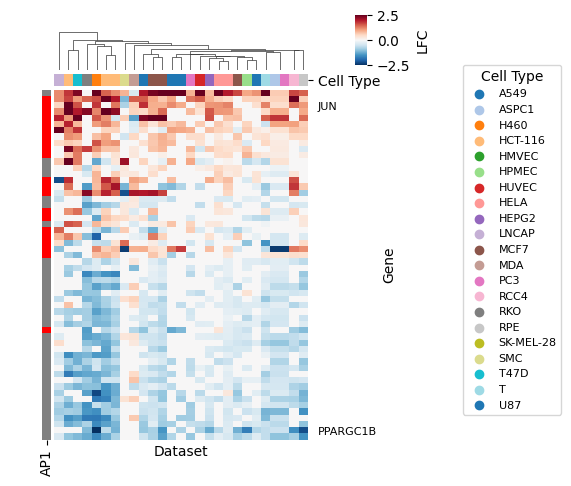

In [22]:
genes_of_interest = ['JUN', 'PPARGC1B', 'PPARGC1A']
labels = [i if i in genes_of_interest else None for i in reg_genes_mat.index]
cm = sns.clustermap(reg_genes_mat, cmap = 'RdBu_r', center = 0, figsize = (4,5), col_cluster = True, row_cluster = False, xticklabels = False,col_colors = results_annot[['Cell Type']], row_colors = gene_annot['AP1'],cbar_kws = {'label' : 'LFC'}, dendrogram_ratio=(0.1, 0.1), cbar_pos=(0.9, 0.9, 0.03, 0.1), vmin = -2.5, vmax = 2.5, yticklabels = labels, rasterized = True, mask = False)
# Remove ylabel
cm.ax_heatmap.set_ylabel('Gene')
cm.ax_heatmap.set_xlabel('Dataset')
# Add legend for cell type
for label in results_annot['cell_type'].unique():
    plt.scatter([], [], c = colors[label], label = label)

# Remove ytick lines
plt.setp(cm.ax_heatmap.yaxis.get_majorticklines(), visible=False)
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), rotation=0, fontsize = 8)


plt.legend(bbox_to_anchor=(9, 0), loc=2, borderaxespad=0., fontsize = 8, title = 'Cell Type')
plt.savefig(os.path.join(PATH, 'figures', 'reg_genes_clustermap.png'), dpi = 300, bbox_inches='tight')

C:\Users\shtolz\AppData\Local\Temp\ipykernel_60432\88379628.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c = colors[label], label = label)


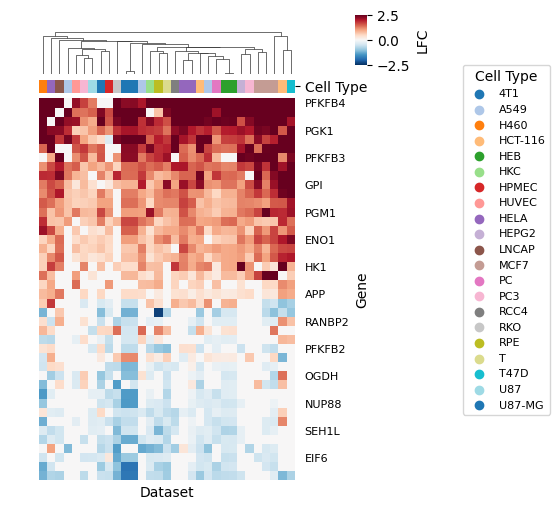

In [ ]:
genes_of_interest = ['JUN', 'FOS', 'JUNB']
labels = [i if i in genes_of_interest else None for i in gly_genes_mat.index]
cm = sns.clustermap(gly_genes_mat, cmap = 'RdBu_r', center = 0, figsize = (4,5), col_cluster = True, row_cluster = False, xticklabels = False,col_colors = results_annot[['Cell Type']],cbar_kws = {'label' : 'LFC'}, dendrogram_ratio=(0.1, 0.1), cbar_pos=(0.9, 0.9, 0.03, 0.1), vmin = -2.5, vmax = 2.5, rasterized = True, mask = False)
# Remove ylabel
cm.ax_heatmap.set_ylabel('Gene')
cm.ax_heatmap.set_xlabel('Dataset')
# Add legend for cell type
for label in results_annot['cell_type'].unique():
    plt.scatter([], [], c = colors[label], label = label)

# Remove ytick lines
plt.setp(cm.ax_heatmap.yaxis.get_majorticklines(), visible=False)
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), rotation=0, fontsize = 8)


plt.legend(bbox_to_anchor=(9, 0), loc=2, borderaxespad=0., fontsize = 8, title = 'Cell Type')
plt.savefig(os.path.join(PATH, 'figures', 'gly_genes_clustermap.png'), dpi = 300, bbox_inches='tight')

C:\Users\shtolz\AppData\Local\Temp\ipykernel_60432\2194216751.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c = colors[label], label = label)


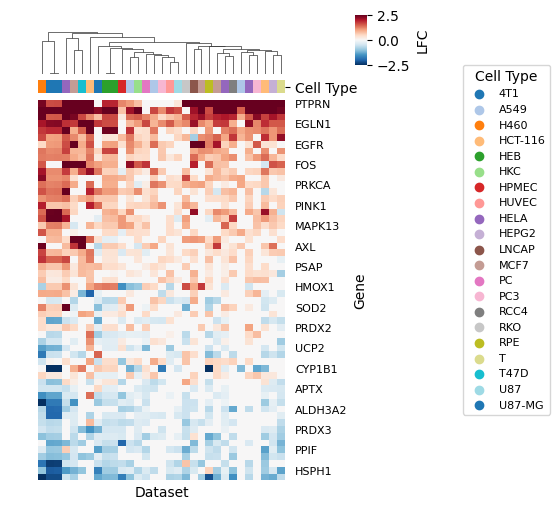

In [ ]:
genes_of_interest = ['JUN', 'FOS', 'JUNB']
labels = [i if i in genes_of_interest else None for i in gly_genes_mat.index]
cm = sns.clustermap(ros_genes_mat, cmap = 'RdBu_r', center = 0, figsize = (4,5), col_cluster = True, row_cluster = False, xticklabels = False,col_colors = results_annot[['Cell Type']],cbar_kws = {'label' : 'LFC'}, dendrogram_ratio=(0.1, 0.1), cbar_pos=(0.9, 0.9, 0.03, 0.1), vmin = -2.5, vmax = 2.5, rasterized = True, mask = False)
# Remove ylabel
cm.ax_heatmap.set_ylabel('Gene')
cm.ax_heatmap.set_xlabel('Dataset')
# Add legend for cell type
for label in results_annot['cell_type'].unique():
    plt.scatter([], [], c = colors[label], label = label)

# Remove ytick lines
plt.setp(cm.ax_heatmap.yaxis.get_majorticklines(), visible=False)
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), rotation=0, fontsize = 8)


plt.legend(bbox_to_anchor=(9, 0), loc=2, borderaxespad=0., fontsize = 8, title = 'Cell Type')
plt.savefig(os.path.join(PATH, 'figures', 'ros_genes_clustermap.png'), dpi = 300, bbox_inches='tight')